# Capstone Project #1: Stastistical Inference & Analysis

## Primary Questions:
1. Do any of the characteristics of the beer (e.g. alcohol by volume or abv) tend to influence my ratings?
2. Is there a significant difference between my individual set of beer ratings when compared to the average user? If yes/no, what does this mean for future prediction methodologies?

In [1]:
import pandas as pd #for building dataframes from CSV files
import seaborn as sns #for fancy charts
import numpy as np #for np.nan
from scipy import stats #for statistical analysis
from scipy.stats import norm #for statistical analysis
from datetime import datetime #for time-series plots
import statsmodels #for integration with pandas and analysis
import matplotlib.pyplot as plt 
%matplotlib inline  

In [2]:
#Initialize dataframes given API data
#This dataset is the set of beers that i have personally tasted and rated
my_beer_df = pd.read_csv('../data/my-final-beer-data.csv')

In [3]:
#always check info()
my_beer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 35 columns):
beer.auth_rating                  181 non-null float64
beer.beer_abv                     181 non-null float64
beer.beer_description             181 non-null object
beer.beer_ibu                     181 non-null int64
beer.beer_label                   181 non-null object
beer.beer_name                    181 non-null object
beer.beer_slug                    181 non-null object
beer.beer_style                   181 non-null object
beer.bid                          181 non-null int64
beer.created_at                   181 non-null object
beer.rating_count                 181 non-null int64
beer.rating_score                 181 non-null float64
beer.wish_list                    181 non-null bool
brewery.brewery_active            181 non-null int64
brewery.brewery_id                181 non-null int64
brewery.brewery_label             181 non-null object
brewery.brewery_name              1

In [12]:
#Let's check the statistics around the quantitative factors
my_beer_df.describe()

,beer.auth_rating,beer.beer_abv,beer.beer_ibu,beer.bid,beer.rating_count,beer.rating_score,brewery.brewery_active,brewery.brewery_id,brewery.location.lat,brewery.location.lng,count,first_checkin_id,rating_score,recent_checkin_id,recent_created_at_timezone
count,181.000000,181.000000,181.000000,1.810000e+02,181.000000,181.000000,181.0,181.000000,181.000000,181.000000,181.000000,1.810000e+02,181.000000,1.810000e+02,181.000000
mean,3.392265,5.870442,27.127072,4.060896e+05,23517.895028,3.438840,1.0,35393.983425,22.990224,-12.951038,1.016575,3.797118e+08,3.392265,3.808877e+08,0.447514
std,0.642906,1.900491,77.978276,5.526310e+05,45528.404033,0.398313,0.0,72053.724608,28.034327,88.612863,0.128025,4.582607e+07,0.642906,4.570316e+07,6.160245
min,1.500000,0.000000,0.000000,1.540000e+02,18.000000,2.319000,1.0,17.000000,-53.155200,-156.437000,1.000000,2.943933e+08,1.500000,2.943933e+08,-8.000000
25%,3.000000,5.000000,0.000000,1.197400e+04,986.000000,3.168000,1.0,1204.000000,4.717360,-87.900200,1.000000,3.364364e+08,3.000000,3.378019e+08,-5.000000
50%,3.500000,5.400000,0.000000,6.970200e+04,4414.000000,3.537000,1.0,4573.000000,35.643200,0.000000,1.000000,3.761521e+08,3.500000,3.764025e+08,2.000000
75%,3.750000,6.370000,40.000000,7.277380e+05,21438.000000,3.729000,1.0,19884.000000,42.314400,19.932100,1.000000,4.255308e+08,3.750000,4.263267e+08,7.000000
max,5.000000,16.900000,1000.000000,1.932539e+06,340554.000000,4.560000,1.0,299073.000000,58.356800,174.780000,2.000000,4.493459e+08,5.000000,4.493459e+08,12.000000


# 1. Do any of the characteristics of the beer (e.g. alcohol by volume or abv) tend to influence my ratings?

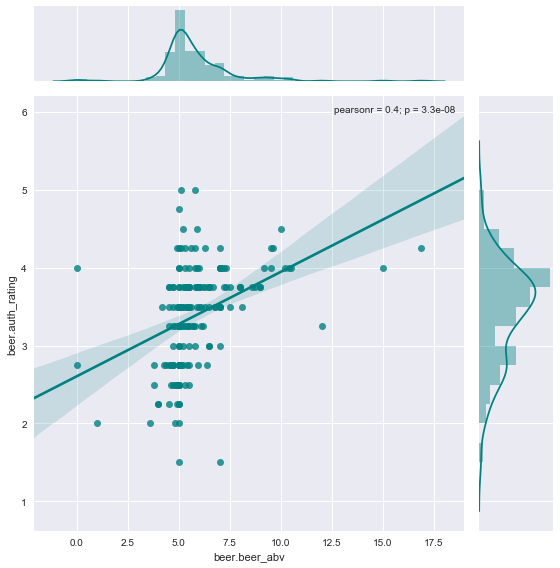

In [5]:
#let's visualize my ratings vs beer alcohol by volume content
sns.jointplot(x="beer.beer_abv", y="beer.auth_rating", data=my_beer_df, kind='reg', color='teal', size=8);

## As we can see in the plot above, with r=0.4 there is a slight positive correlation, but not too signficant. There seem to be other factors at play, other than ABV that dictate my ratings.

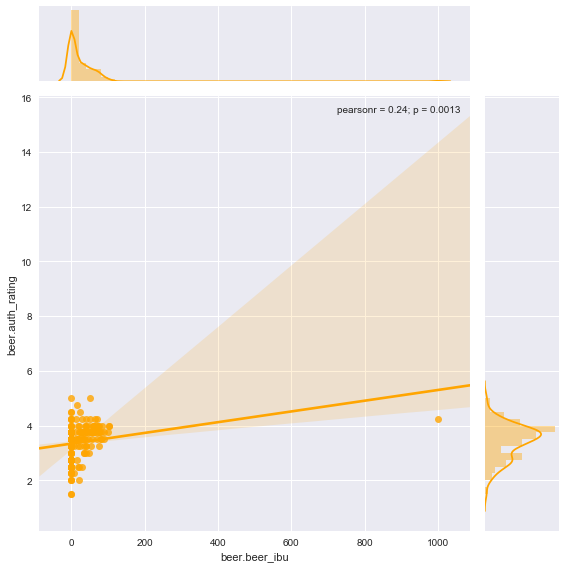

In [6]:
#let's visualize my ratings vs beer bitterness content (ibu)
sns.jointplot(x="beer.beer_ibu", y="beer.auth_rating", data=my_beer_df, kind='reg', color='orange', size=8);

## It appears that 'beer_ibu' has some data integrity issues as many of the beers have a beer_ibu = 0.

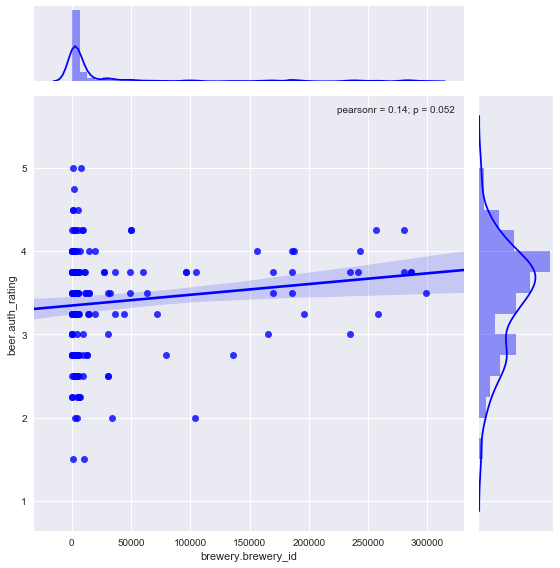

In [7]:
#let's visualize my ratings vs brewery (manufacturer)
sns.jointplot(x="brewery.brewery_id", y="beer.auth_rating", data=my_beer_df, kind='reg', color='blue', size=8);

## Ratings by brewery also wildly vary and there is little-to-no correlation to my ratings.

## Finally, let's check if the beer style influences my ratings

In [18]:
# Let's use OLS to check how if the beer style correlates to my ratings
from statsmodels.formula.api import ols
y = my_beer_df['beer.auth_rating']
X = my_beer_df['beer.beer_style']
model = ols(formula="y ~ C(X)", data=my_beer_df).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     5.419
Date:                Thu, 18 May 2017   Prob (F-statistic):           3.18e-15
Time:                        15:25:26   Log-Likelihood:                -67.707
No. Observations:                 181   AIC:                             245.4
Df Residuals:                     126   BIC:                             421.3
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

## We see a stronger correlation with the "beer style" variable, with R-squared at 0.699, it is positively correlated and our strongest predictor (at this point).

In [23]:
# Let's do the same thing, with brewery included this time as another var
y2 = my_beer_df['beer.auth_rating']
X2 = my_beer_df['beer.beer_style']
X2_2 = my_beer_df['brewery.brewery_name']
model2 = ols(formula="y2 ~ C(X2) + C(X2_2)", data=my_beer_df).fit()
print(model2.summary()) 

                            OLS Regression Results                            
Dep. Variable:                     y2   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     2.143
Date:                Thu, 18 May 2017   Prob (F-statistic):             0.0783
Time:                        15:32:56   Log-Likelihood:                 142.58
No. Observations:                 181   AIC:                             54.84
Df Residuals:                      11   BIC:                             598.6
Df Model:                         169                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

## Interesting to note that when brewery is included, the R-squared jumps to 0.971!!! Not to get too excited, because our Adj. R-squared actually is worse, so we have crossed into over-fitting territory.

In [29]:
# Let's do the same thing, with brewery included this time as another var
y3 = my_beer_df['beer.auth_rating']
X3 = my_beer_df['beer.beer_style']
X3_3 = my_beer_df['brewery.country_name'] 
model3 = ols(formula="y3 ~ C(X3) + C(X3_3)", data=my_beer_df).fit()
print(model3.summary()) 

                            OLS Regression Results                            
Dep. Variable:                     y3   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     5.214
Date:                Thu, 18 May 2017   Prob (F-statistic):           1.92e-14
Time:                        15:45:22   Log-Likelihood:                -24.378
No. Observations:                 181   AIC:                             214.8
Df Residuals:                      98   BIC:                             480.2
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

## Here we are looking to see if country of production introduces any benefit to the model. Overall the R-squared is lower than model2, however, the Adj. R-squared is actually greatest in this version. We will continue this exploration once we get to the machine learning section of the course.

# 2. Is there a significant difference between my individual set of beer ratings when compared to the average user? If yes/no, what does this mean for future prediction methodologies?

In [19]:
#This looks to be of the most interest, given I am curious how different my ratings are compared to the avg user
my_beer_df[['beer.auth_rating', 'beer.rating_score']].describe()

,beer.auth_rating,beer.rating_score
count,181.000000,181.000000
mean,3.392265,3.438840
std,0.642906,0.398313
min,1.500000,2.319000
25%,3.000000,3.168000
50%,3.500000,3.537000
75%,3.750000,3.729000
max,5.000000,4.560000


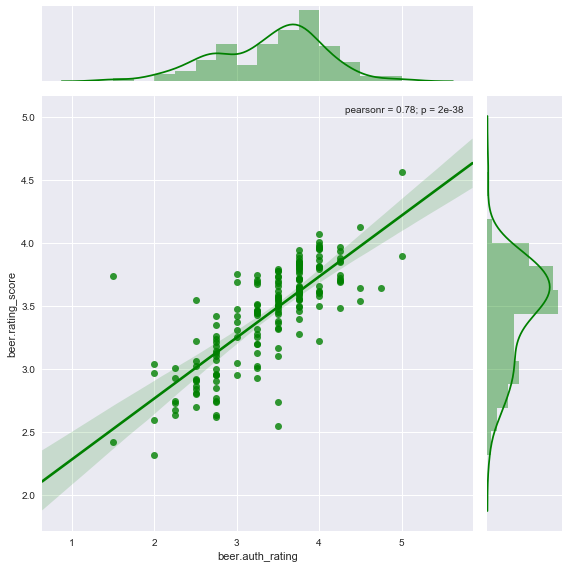

In [20]:
#let's visualize my ratings vs the avg user
sns.jointplot(x="beer.auth_rating", y="beer.rating_score", data=my_beer_df, kind='reg', color='green', size=8);

## Run a Two-sided T-test with the following hypotheses:
Null hypothesis: mean of my beer ratings = mean of avg user beer ratings

Alternate hypothesis: mean of my beer ratings != mean of avg user beer ratings

In [27]:
#leverage the Python stats package for ease
stats.ttest_ind(my_beer_df['beer.auth_rating'], my_beer_df['beer.rating_score'])

Ttest_indResult(statistic=-0.82850869202138933, pvalue=0.40793141463231308)

## Interesting results. Given the high p-value: 0.41 I cannot reject the null hypothesis that the means of my ratings and the average user are different. 